### Imported Libraries

In [18]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import os
import seaborn as sns


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog
from imutils import paths
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### DATASET 1

### Dataset Extraction and preperation

In [19]:
images = list(paths.list_images('Dataset 1'))
len(images)

981

### Displaying Dataset

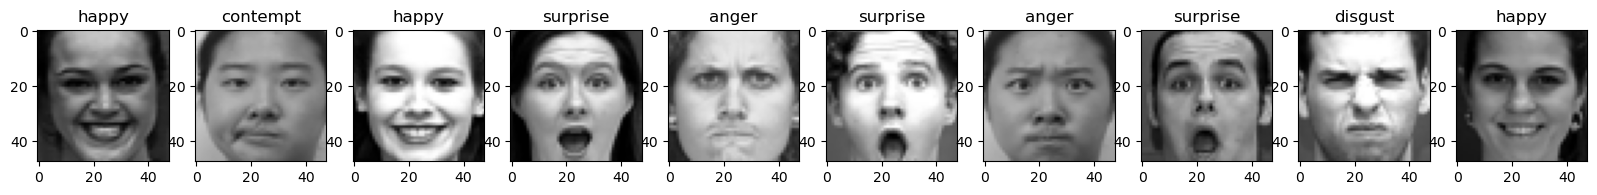

In [20]:
imagesdisplay = plt.figure(figsize=(20, 20))

for i in range(10):
    imagesdisplay.add_subplot(1, 10, i+1)
    # imread = reads image file and returns image data
    r = random.randint(0, 981)
    plt.imshow(np.array(cv2.imread(images[r])))
    # imshow = displays the image data in the form of a raster image, returns an AxesImage
    label = images[r].split(os.path.sep)[-2]  # category of the image
    plt.title(label)
    


### Feature Extraction Function

In [21]:
def gray(x):
    image = cv2.imread(x)
    grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayimage

def imageSize(x,size):
    return cv2.resize(x,(size,size))

def feature_extract(images):
    features = []
    labels = []
    
    for image in images:
        x = gray(image)
        x = imageSize(x,64)
        hogfunc = hog(x, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)
        
        label = image.split(os.path.sep)[-2]
        labels.append(label)
        features.append(hogfunc)
        
    features = np.array(features)
    labels = np.array(labels)
    return features,labels

In [22]:
features, labels = feature_extract(images)

print("[INFO] The number of features ..." + str(features.shape[1]))
print("[INFO] The number of samples ..." + str(labels.shape[0]))

[INFO] The number of features ...3600
[INFO] The number of samples ...981


In [23]:
df = pd.DataFrame(features)
df

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0.043265,0.048504,0.002299,0.000655,0.012891,0.000000,0.000414,0.000000,0.002135,0.032374,...,0.162681,0.010299,0.000000,0.000000,0.100103,0.078386,0.011035,0.011326,0.007756,0.002028
1,0.050018,0.049111,0.002144,0.000000,0.011218,0.000678,0.000429,0.000000,0.002209,0.026476,...,0.139772,0.005659,0.000000,0.009463,0.191260,0.116501,0.013395,0.006910,0.006366,0.001167
2,0.053381,0.024464,0.012961,0.001798,0.012509,0.000000,0.000804,0.001907,0.000000,0.040059,...,0.182919,0.007281,0.001400,0.001400,0.061395,0.106954,0.008532,0.016397,0.009505,0.001428
3,0.059885,0.003309,0.004410,0.001169,0.016491,0.012383,0.009906,0.010949,0.008381,0.116155,...,0.185588,0.138875,0.009026,0.000000,0.000000,0.004022,0.000000,0.031858,0.265142,0.052494
4,0.039857,0.003075,0.003720,0.002630,0.019181,0.007437,0.018091,0.006442,0.022304,0.122217,...,0.177282,0.138350,0.008752,0.000000,0.000000,0.003703,0.000000,0.000000,0.252384,0.058293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.213372,0.048037,0.002742,0.000619,0.068409,0.000000,0.000000,0.000000,0.001412,0.142497,...,0.056786,0.005257,0.000830,0.007911,0.010370,0.015589,0.011451,0.003150,0.000000,0.000000
977,0.133182,0.045988,0.005715,0.000913,0.039835,0.000000,0.000408,0.000000,0.002944,0.126135,...,0.078350,0.004064,0.004316,0.002899,0.012565,0.024752,0.003989,0.001854,0.000826,0.000000
978,0.029180,0.023837,0.027988,0.001484,0.028331,0.002708,0.003935,0.009164,0.007149,0.011589,...,0.017699,0.009082,0.008156,0.012173,0.002129,0.005225,0.001846,0.001232,0.001298,0.000000
979,0.019417,0.010190,0.005834,0.005263,0.018853,0.002375,0.000751,0.016218,0.003548,0.010906,...,0.031625,0.004535,0.009529,0.019186,0.015905,0.008460,0.000887,0.000794,0.000000,0.000000


### SVM Classification

In [26]:
svmclassif = SVC(kernel = 'rbf', gamma = 'scale', C = 1)


R = random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state = R)
print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))
svmclassif.fit(X_train, y_train)

prediction = svmclassif.predict(X_test)

[INFO] The number of images used in training ...686
[INFO] The number of images used in testing ...295


### Prediction and Accuracy Testing

Train Result:
Accuracy Score: 94.92%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       anger       0.88      1.00      0.94        44
    contempt       1.00      0.95      0.97        20
     disgust       1.00      1.00      1.00        49
        fear       0.89      0.89      0.89        27
       happy       0.97      1.00      0.99        68
     sadness       1.00      0.71      0.83        21
    surprise       0.94      0.92      0.93        66

    accuracy                           0.95       295
   macro avg       0.95      0.93      0.94       295
weighted avg       0.95      0.95      0.95       295

_______________________________________________
Confusion Matrix: 
 AxesSubplot(0.22375,0.11;0.5775x0.77)



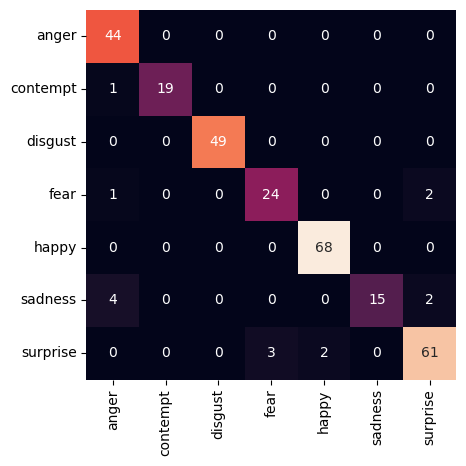

In [27]:
classifreport = classification_report(y_test, prediction)
mat = confusion_matrix(y_test, prediction)
heatmap = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                      xticklabels=svmclassif.classes_,
                      yticklabels=svmclassif.classes_)


print("Train Result:\n================================================")
print(
    f"Accuracy Score: {accuracy_score(y_test, prediction) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classifreport}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {heatmap}\n")

### DATASET 2

In [28]:
images2 = list(paths.list_images('Dataset 2'))
len(images2)

28821

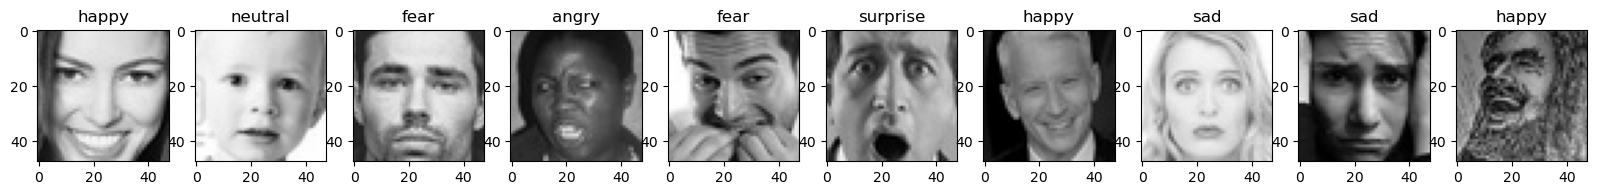

In [29]:
imagesdisplay2 = plt.figure(figsize=(20, 20))

for i in range(10):
    imagesdisplay2.add_subplot(1, 10, i+1)
    # imread = reads image file and returns image data
    r2 = random.randint(0, 28821)
    plt.imshow(np.array(cv2.imread(images2[r2])))
    # imshow = displays the image data in the form of a raster image, returns an AxesImage
    label2 = images2[r2].split(os.path.sep)[-2]  # category of the image
    plt.title(label2)
    

In [30]:
features2, labels2 = feature_extract(images2)

print("[INFO] The number of features ..." + str(features2.shape[1]))
print("[INFO] The number of samples ..." + str(labels2.shape[0]))

[INFO] The number of features ...3600
[INFO] The number of samples ...28821


In [31]:
svmclassif2 = SVC(kernel = 'rbf', gamma = 'scale', C = 100)

R2 =random.randint(1,88)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size= 0.2,random_state = R2)
print("[INFO] The number of images used in training ..." + str(X_train2.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test2.shape[0]))
svmclassif2.fit(X_train2, y_train2)

print('Done fitting')

prediction2 = svmclassif2.predict(X_test2)
print('Done predicting')

[INFO] The number of images used in training ...23056
[INFO] The number of images used in testing ...5765
Done fitting
Done predicting


Test Result:
Accuracy Score: 56.46%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       angry       0.48      0.44      0.46       819
     disgust       0.88      0.38      0.53        95
        fear       0.43      0.40      0.42       808
       happy       0.71      0.80      0.75      1448
     neutral       0.51      0.50      0.50      1015
         sad       0.44      0.48      0.46       952
    surprise       0.77      0.65      0.71       628

    accuracy                           0.56      5765
   macro avg       0.60      0.52      0.55      5765
weighted avg       0.57      0.56      0.56      5765

_______________________________________________
Confusion Matrix: 
 AxesSubplot(0.22375,0.11;0.5775x0.77)



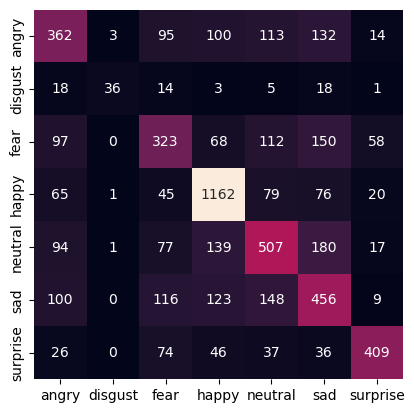

In [32]:
classifreport2 = classification_report(y_test2, prediction2)
mat = confusion_matrix(y_test2, prediction2)
heatmap2 = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                      xticklabels=svmclassif2.classes_,
                      yticklabels=svmclassif2.classes_)


print("Test Result:\n================================================")
print(
    f"Accuracy Score: {accuracy_score(y_test2, prediction2) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classifreport2}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {heatmap}\n")